X_train shape: (60000, 784)
X_test shape: (10000, 784)
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.3204 - val_loss: 0.1604
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1518 - val_loss: 0.1285
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1253 - val_loss: 0.1115
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1103 - val_loss: 0.1026
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1025 - val_loss: 0.0978
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0984 - val_loss: 0.0953
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0964 - val_loss: 0.0940
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0954 - val_loss: 0.0935
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0947 - val_loss: 0.0930
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0943 - val_loss: 0.0930
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0940 - val_loss: 0.09

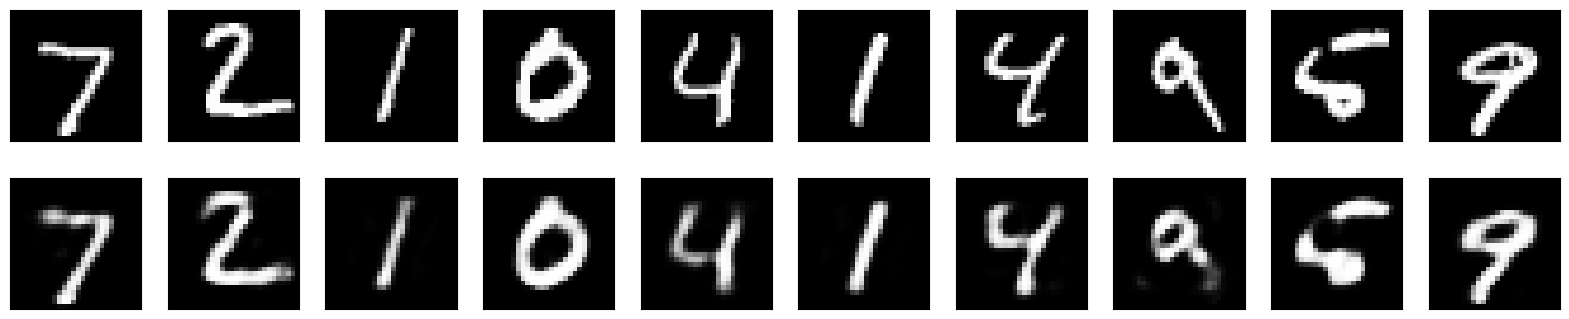

In [ ]:
import keras                                           #TYPE 1 --- UNDERCOMPLETE AUTOENCODER
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input

input_size = 784
encoding_dim = 32

(X_train,_),(X_test,_)=mnist.load_data()

X_train=X_train.astype("float32")/255.
X_test=X_test.astype("float32")/255.
X_train=X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test=X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

input_img=Input(shape=(input_size,))
encoded=Dense(encoding_dim,activation="relu")(input_img)
decoded=Dense(input_size,activation="sigmoid")(encoded)

autoencoder=Model(inputs=input_img,outputs=decoded)

autoencoder.compile(optimizer="adam",loss="binary_crossentropy")

autoencoder.fit(X_train,X_train,epochs=20,batch_size=128,shuffle=True,validation_data=(X_test,X_test))
decoded_imgs=autoencoder.predict(X_test)

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

